In [327]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [328]:
raw_data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
raw_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [329]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [330]:
data = raw_data.copy()
data.dropna(inplace=True)

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [332]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'],axis=1)
y = data['median_house_value']

In [333]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [334]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [335]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [336]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2818,-119.03,35.41,37.0,1761.0,443.0,911.0,365.0,2.0331,INLAND,53200.0
17143,-122.18,37.45,37.0,5257.0,1360.0,2128.0,1264.0,4.0000,NEAR BAY,394300.0
6309,-117.99,34.04,30.0,4468.0,959.0,4027.0,938.0,3.1850,<1H OCEAN,168300.0
19505,-121.03,37.64,22.0,2001.0,387.0,1520.0,387.0,3.1480,INLAND,102300.0
18676,-121.90,36.93,22.0,7281.0,1233.0,1849.0,832.0,5.3276,NEAR OCEAN,335500.0
...,...,...,...,...,...,...,...,...,...,...
19316,-122.89,38.40,22.0,2900.0,538.0,1445.0,515.0,4.5110,<1H OCEAN,296800.0
17517,-121.94,37.33,34.0,1809.0,317.0,863.0,302.0,4.3000,<1H OCEAN,330500.0
16163,-122.50,37.77,52.0,1769.0,414.0,1032.0,380.0,3.9954,NEAR BAY,324700.0
13202,-117.71,34.06,27.0,2127.0,628.0,1970.0,534.0,1.4722,INLAND,91300.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

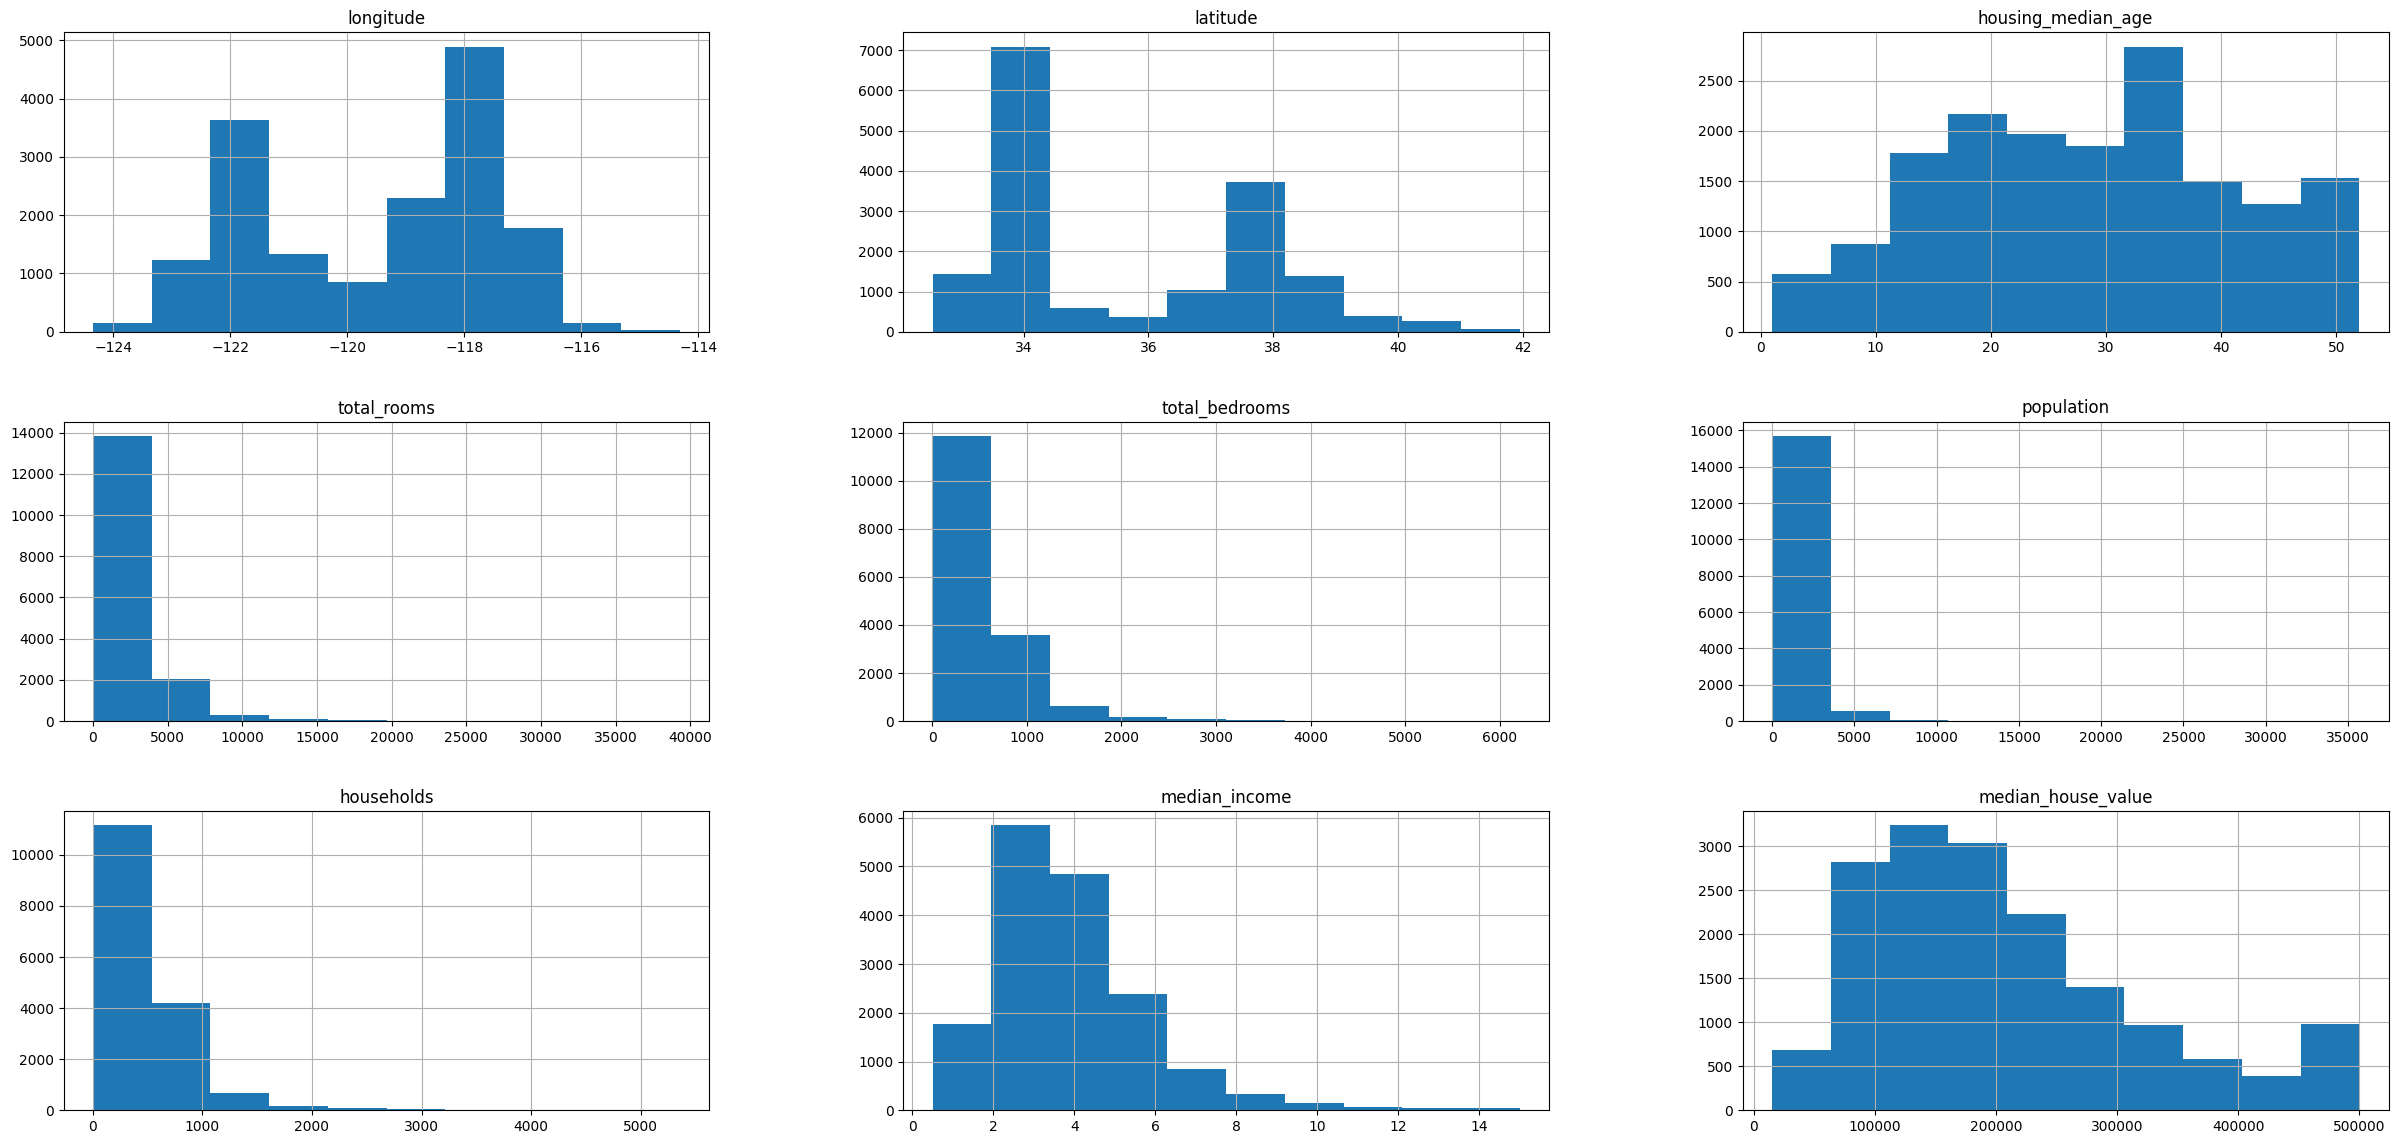

In [337]:
train_data.hist(figsize=(30,14))

In [338]:
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925091,-0.108852,0.046178,0.071458,0.101403,0.057721,-0.020002,-0.051546
latitude,-0.925091,1.000000,0.011352,-0.038246,-0.069618,-0.111754,-0.074194,-0.076353,-0.139576
housing_median_age,-0.108852,0.011352,1.000000,-0.359449,-0.321716,-0.297443,-0.303996,-0.110582,0.111403
total_rooms,0.046178,-0.038246,-0.359449,1.000000,0.930948,0.858172,0.918321,0.203787,0.136716
total_bedrooms,0.071458,-0.069618,-0.321716,0.930948,1.000000,0.877437,0.979222,-0.000487,0.053065
population,0.101403,-0.111754,-0.297443,0.858172,0.877437,1.000000,0.907718,0.013486,-0.020607
households,0.057721,-0.074194,-0.303996,0.918321,0.979222,0.907718,1.000000,0.020969,0.068735
median_income,-0.020002,-0.076353,-0.110582,0.203787,-0.000487,0.013486,0.020969,1.000000,0.688775
median_house_value,-0.051546,-0.139576,0.111403,0.136716,0.053065,-0.020607,0.068735,0.688775,1.000000


<AxesSubplot: >

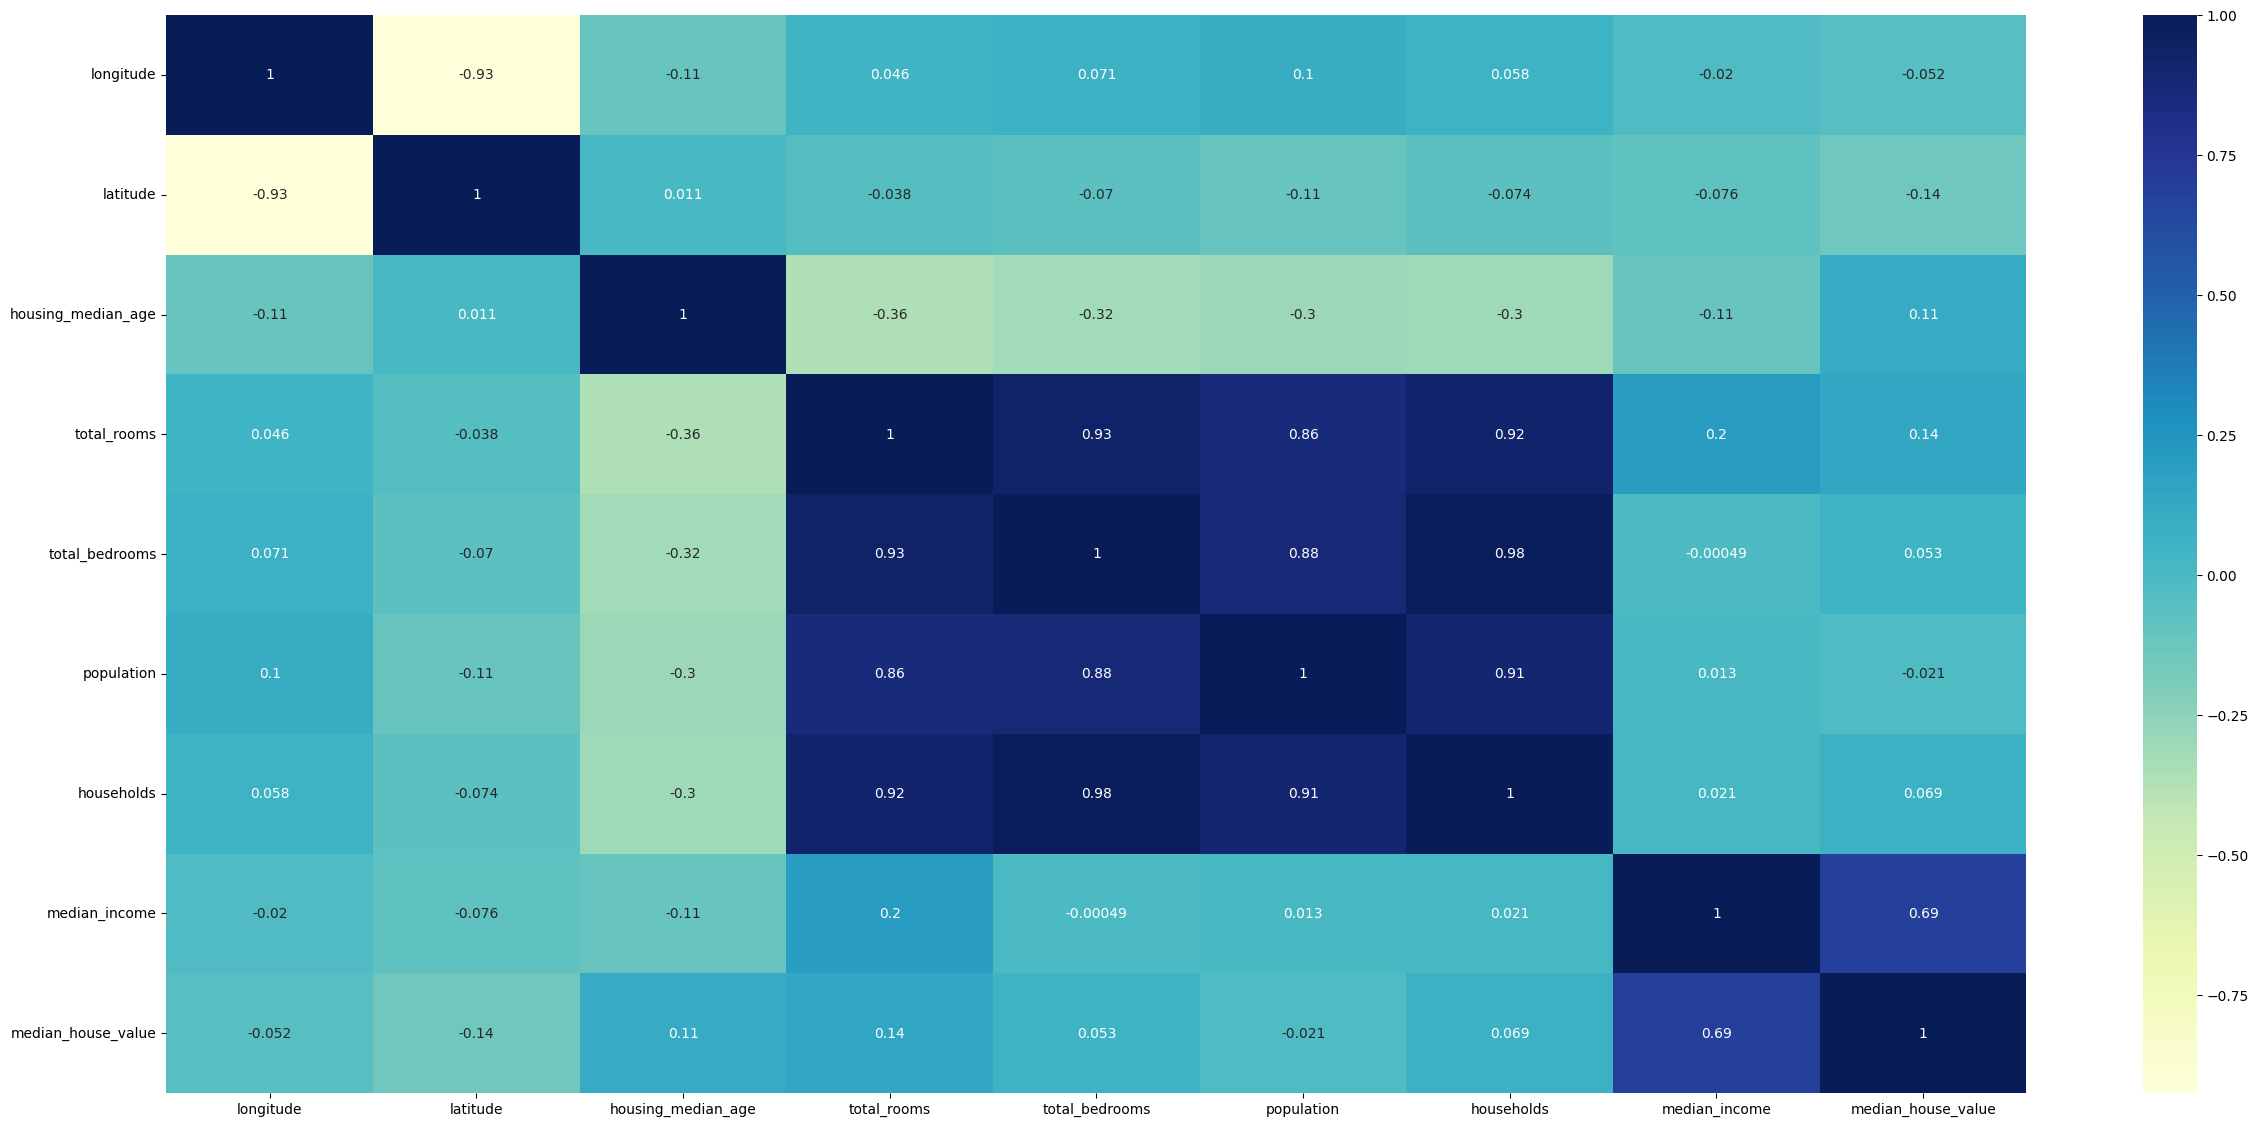

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,14))
sns.heatmap(train_data.corr(numeric_only = True),annot=True,cmap="YlGnBu")

In [340]:
# Most of the data columns are right skewed
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

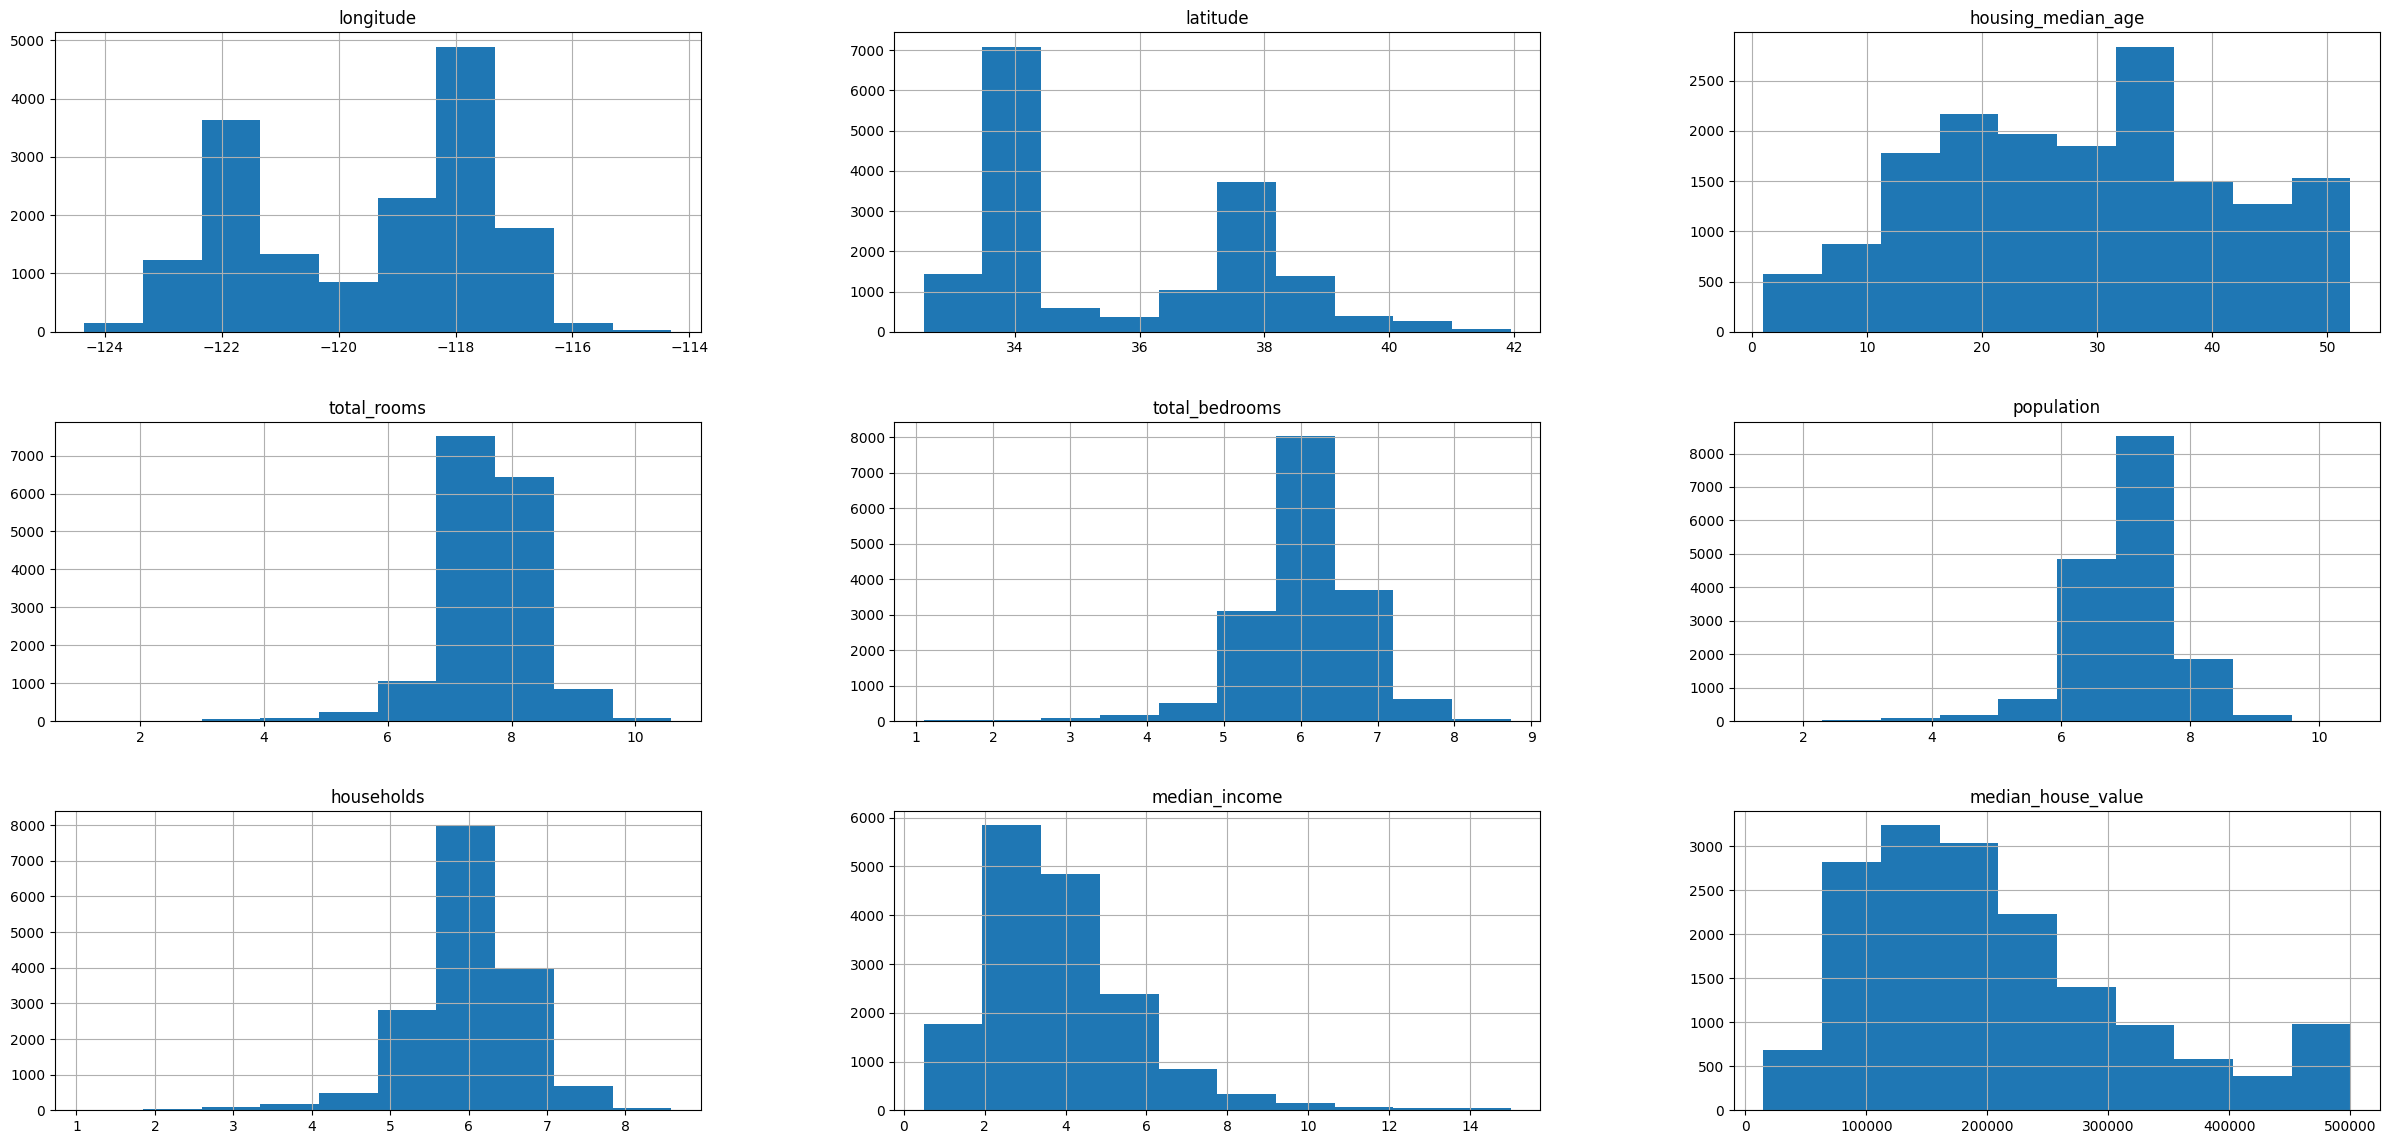

In [341]:
train_data.hist(figsize=(30,14))

In [342]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity))
train_data = train_data.drop(['ocean_proximity'],axis=1)

<AxesSubplot: >

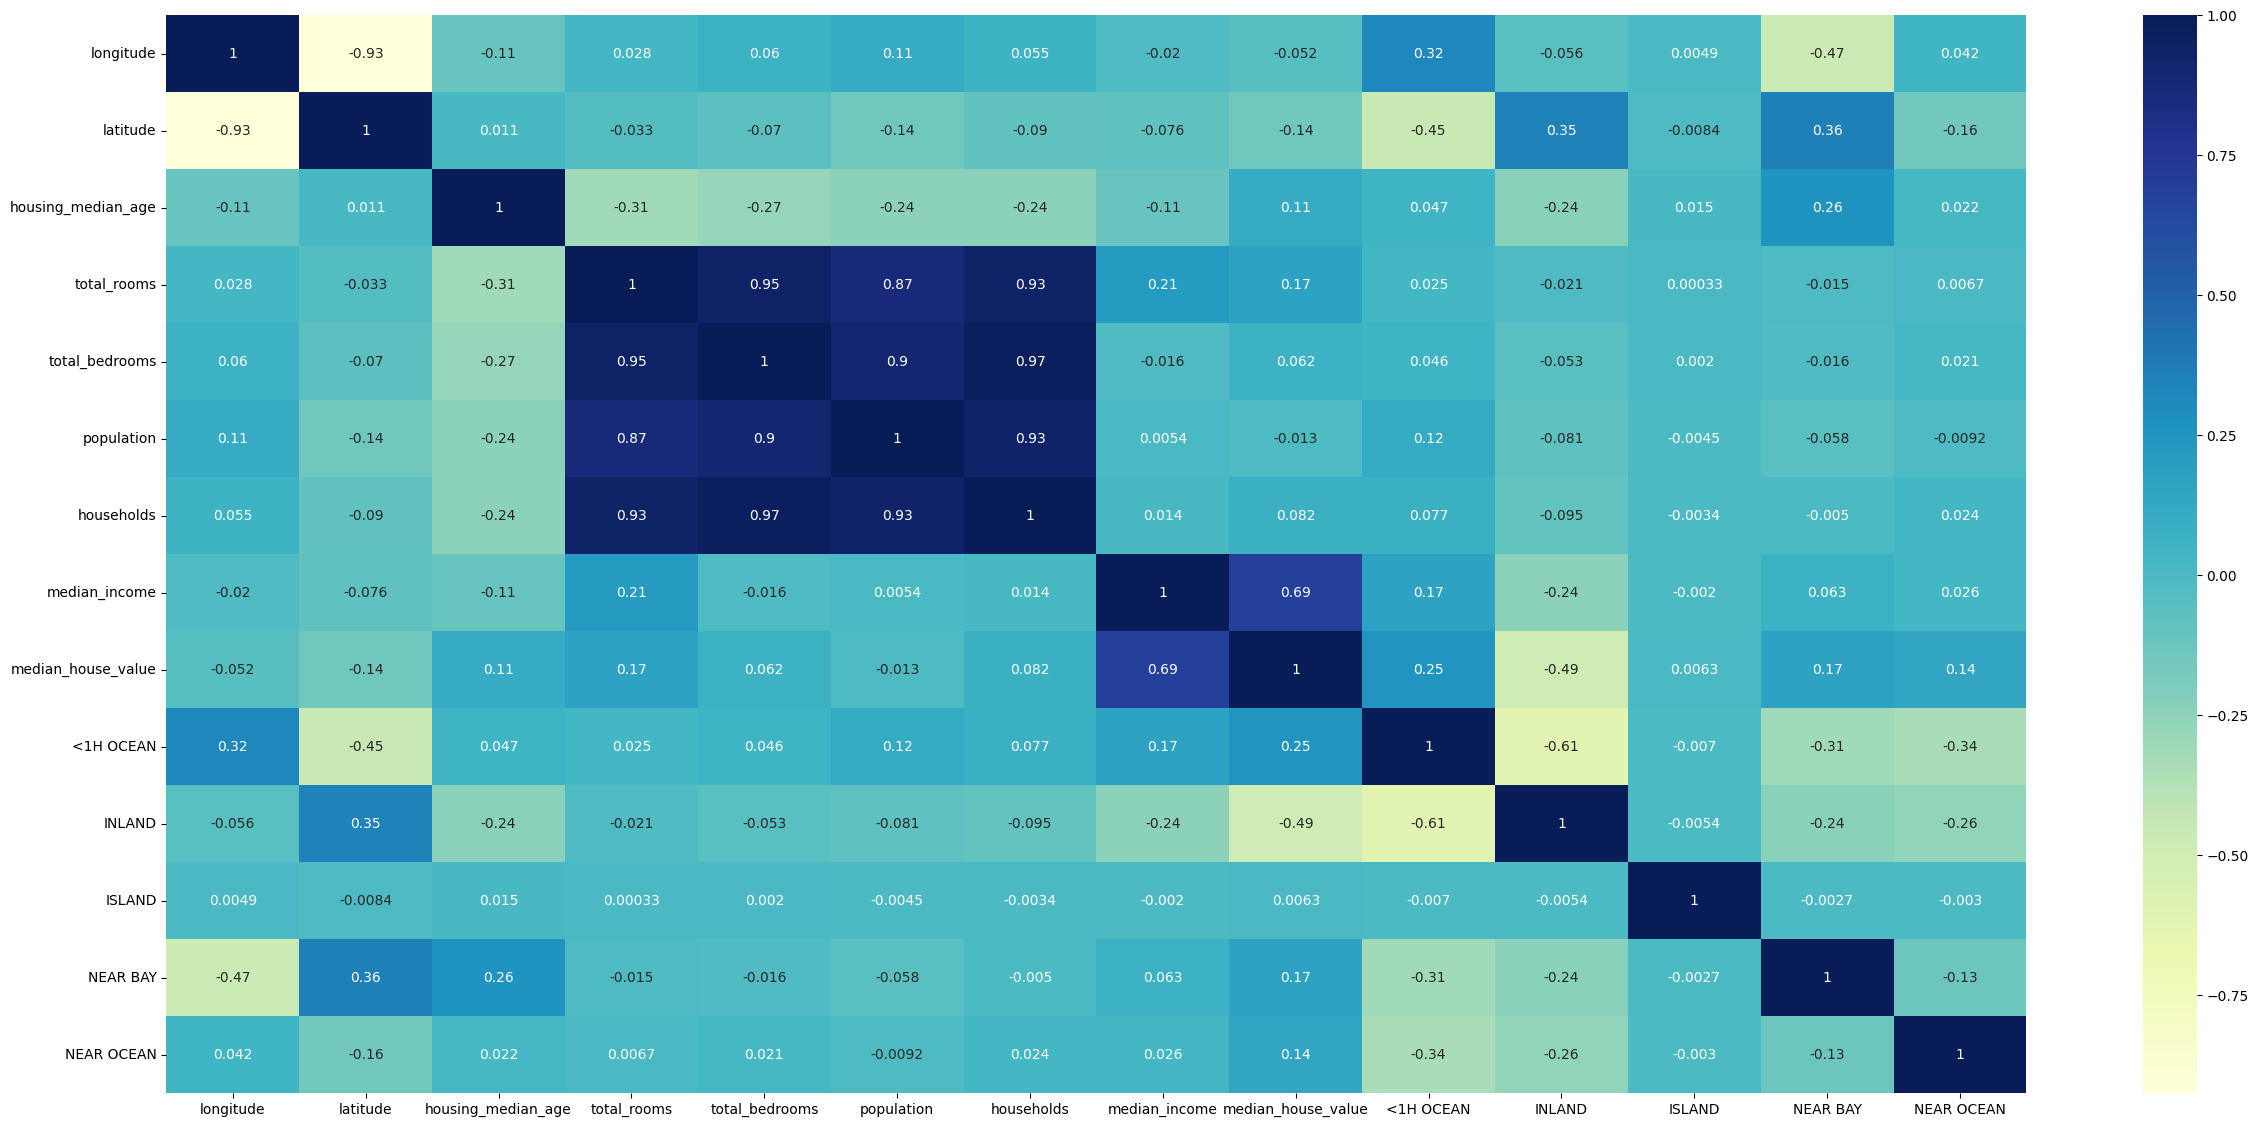

In [343]:
plt.figure(figsize=(30,14))
sns.heatmap(train_data.corr(numeric_only = True),annot=True,cmap="YlGnBu")

In [344]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,Y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_scaled = scaler.fit_transform(X_train)

lr_model = LinearRegression()

lr_model.fit(X_train_scaled,Y_train)

LinearRegression()

In [345]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity))
test_data = test_data.drop(['ocean_proximity'],axis=1)

X_test,Y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']
X_test_scaled = scaler.transform(X_test)

In [346]:
lr_model.score(X_test_scaled,Y_test)

0.6691923186233558

In [350]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor()

rf_model.fit(X_train_scaled,Y_train)
Y_rf_pred = rf_model.predict(X_test_scaled)

print(r2_score(Y_test,Y_rf_pred))

0.8241366221774822


In [352]:
from sklearn.svm import SVR

svr_model = SVR() 

svr_model.fit(X_train_scaled, Y_train)

Y_sr_pred = svr_model.predict(X_test_scaled)

print(r2_score(Y_test,Y_sr_pred))

-0.04440489981104645
